<a href="https://colab.research.google.com/github/fkivuti/Sendy-Feature-Engineering-Project/blob/main/Feature_Engineering_project_ipynb_wk7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

As a Data Scientist working for Sendy, I need to build a model that
predicts an accurate delivery time, from the time a package is picked up to the time it arrives at its intended destination.

### b) Defining the Metric for Success

Our project will be successful if we are able to improve the base model continuously through feature engineering.

### c) Understanding the Context 

Sendy is a business-to-business platform established in 2014, to enable businesses of all types and sizes to transport goods more efficiently across East Africa. The company intends to build a model that predicts an accurate delivery time, from the time a package is picked up to the time it arrives at its intended destination
The solution will help Sendy enhance customer communication and improve the reliability of its service; which will ultimately improve customer experience

### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

The data provided was relevant to answering the research question.

# <font color='#2F4F4F'>2. Dataset & Glossary Importation</font>

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [2]:
# loading and previewing dataset
df = pd.read_csv('https://bit.ly/3deaKEM')
df.sample(5)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
13223,Order_No_12611,User_Id_1978,Bike,2,Personal,4,6,12:35:58 PM,4,6,12:36:14 PM,4,6,12:47:25 PM,4,6,12:58:03 PM,4,6,1:04:40 PM,2,20.0,NaN,-1.288119,36.795859,-1.287431,36.776491,Rider_Id_400,397
16597,Order_No_20772,User_Id_1792,Bike,3,Business,12,2,11:38:12 AM,12,2,11:38:22 AM,12,2,11:51:21 AM,12,2,11:55:09 AM,12,2,12:19:28 PM,11,20.9,NaN,-1.288159,36.792528,-1.251921,36.828379,Rider_Id_635,1459
15544,Order_No_27266,User_Id_2328,Bike,2,Personal,3,4,12:18:04 PM,3,4,12:18:26 PM,3,4,12:38:48 PM,3,4,12:43:20 PM,3,4,1:03:26 PM,10,21.9,NaN,-1.298529,36.816482,-1.235555,36.847419,Rider_Id_742,1206
8822,Order_No_20667,User_Id_733,Bike,3,Business,17,3,4:43:23 PM,17,3,5:03:42 PM,17,3,5:03:47 PM,17,3,5:10:50 PM,17,3,5:34:41 PM,15,NaN,NaN,-1.255189,36.782203,-1.207546,36.791398,Rider_Id_576,1431
5161,Order_No_1660,User_Id_2587,Bike,3,Business,19,6,1:43:32 PM,19,6,1:44:51 PM,19,6,1:53:12 PM,19,6,2:03:11 PM,19,6,2:19:02 PM,5,27.8,NaN,-1.258414,36.804800,-1.288780,36.816831,Rider_Id_899,951


In [ ]:
# loading and previewing dataset glossary
glossary = pd.read_csv('https://bit.ly/30O3xsr')
glossary

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a platform
1,Vehicle Type,"For this competition limited to bikes, however in practice Sendy service extends to trucks and vans"
2,Platform Type,"Platform used to place the order, there are 4 types"
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was placed
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order was confirmed by a rider


# <font color='#2F4F4F'>3. Data Exploration and Cleaning</font>

In [3]:
# checking dataset shape
df.shape

(21201, 29)

In [4]:
# checking data types
df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [5]:
# get the unique value of each variable to ensure there are no anomalies
cols = df.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique variables:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: Order No
Number of unique variables: 21201
['Order_No_4211' 'Order_No_25375' 'Order_No_1899' ... 'Order_No_2831'
 'Order_No_6174' 'Order_No_9836']

Variable: User Id
Number of unique variables: 3186
['User_Id_633' 'User_Id_2285' 'User_Id_265' ... 'User_Id_875'
 'User_Id_2001' 'User_Id_2524']

Variable: Vehicle Type
Number of unique variables: 1
['Bike']

Variable: Platform Type
Number of unique variables: 4
[3 1 2 4]

Variable: Personal or Business
Number of unique variables: 2
['Business' 'Personal']

Variable: Placement - Day of Month
Number of unique variables: 31
[ 9 12 30 15 13 14 11 23  2 25 19 28 22 10  3  5 17  8  7 31 24 27 16 26
 18 21  1  4  6 29 20]

Variable: Placement - Weekday (Mo = 1)
Number of unique variables: 7
[5 2 1 3 4 6 7]

Variable: Placement - Time
Number of unique variables: 15686
['9:35:46 AM' '11:16:16 AM' '12:39:25 PM' ... '4:48:16 PM' '5:02:09 PM'
 '5:06:16 PM']

Variable: Confirmation - Day of Month
Number of unique variables: 31
[ 9 12 30 15 13

In [6]:
# dropping duplicates, if any
df['Order No'].drop_duplicates(inplace = True)
df.shape

(21201, 29)

There are no duplicate order numbers

In [7]:
# checking for unique rider id.
unique_df = df[df.duplicated(['Rider Id'])]
unique_df.shape

(20277, 29)

The model may not learn much from the rider id as huge percentage of these are unique

In [8]:
# checking for missing data
df.isna().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [9]:
# check the mean and mode of teh Temprature colum
mean_value = df.Temperature.mean()
mode_value = df.Temperature.mode()
print("The mean temprature is :", mean_value)
print("The mode temprature is :", mode_value)


The mean temprature is : 23.25888921888938
The mode temprature is : 0    24.7
dtype: float64


Two columns Temprature and Precipitation in MM have null values in some observations. We will drop Precipitation in MM column and populate temprature column with the mean

In [10]:
# drop unwanted columns i.e. 'Order No', 'User Id', 'Vehicle Type', 'Precipitation in millimeters'
df.drop(columns = ['Order No', 'User Id', 'Vehicle Type', 'Precipitation in millimeters'], inplace = True)
df.shape

(21201, 25)

In [11]:
# drop rider id
df.drop(columns = ['Rider Id'], inplace = True)
df.shape

(21201, 24)

In [12]:
# Populate null values in teparature using the mean
df['Temperature'].fillna(float(df['Temperature'].mean()), inplace=True)
df['Temperature'].isna().sum()

0

In [13]:
# getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(3)


(6471, 24)


,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
6689,3,Business,27,4,12:39:47 PM,27,4,1:17:18 PM,27,4,1:23:23 PM,27,4,1:36:28 PM,27,4,2:03:22 PM,13,23.6,-1.318998,36.710408,-1.296770,36.804038,1614
13298,1,Personal,30,3,9:51:12 AM,30,3,9:56:24 AM,30,3,10:07:25 AM,30,3,10:08:33 AM,30,3,10:20:13 AM,7,17.3,-1.295041,36.809817,-1.325710,36.805533,700
5690,1,Personal,14,2,4:24:07 PM,14,2,4:30:26 PM,14,2,5:12:09 PM,14,2,5:17:14 PM,14,2,5:47:50 PM,18,23.4,-1.227132,36.837428,-1.290059,36.770347,1836


In [14]:
# calculating percentage of outliers
round((outliers_df.shape[0] / df.shape[0]) * 100, 2)

30.52

For now we will not drop the outliers as these account for 31% of our dataset which is huge

In [15]:
df.head(10)

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
0,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.400000,-1.317755,36.830370,-1.300406,36.829741,745
1,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.400000,-1.351453,36.899315,-1.295004,36.814358,1993
2,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,23.258889,-1.308284,36.843419,-1.300921,36.828195,455
3,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.200000,-1.281301,36.832396,-1.257147,36.795063,1341
4,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.400000,-1.266597,36.792118,-1.295041,36.809817,1214
5,3,Business,14,5,3:07:35 PM,14,5,3:08:57 PM,14,5,3:21:36 PM,14,5,3:30:30 PM,14,5,4:23:41 PM,9,27.200000,-1.302583,36.767081,-1.257309,36.806008,3191
6,3,Business,9,5,9:33:45 AM,9,5,9:49:47 AM,9,5,9:53:12 AM,9,5,9:56:45 AM,9,5,10:19:45 AM,5,20.300000,-1.279395,36.825364,-1.276574,36.851365,1380
7,3,Business,11,1,2:13:01 PM,11,1,2:14:13 PM,11,1,2:21:33 PM,11,1,2:22:40 PM,11,1,2:33:26 PM,3,28.700000,-1.252796,36.800313,-1.255189,36.782203,646
8,3,Business,30,2,11:10:44 AM,30,2,11:15:49 AM,30,2,12:13:18 PM,30,2,12:22:57 PM,30,2,1:19:35 PM,9,23.258889,-1.255189,36.782203,-1.300255,36.825657,3398
9,3,Business,23,5,4:48:54 PM,23,5,5:17:56 PM,23,5,5:32:41 PM,23,5,5:34:38 PM,23,5,6:31:57 PM,14,24.600000,-1.225322,36.808550,-1.215601,36.891686,3439


In [16]:
# encoding 'Personal or Business'
encoded_vals = {"Personal or Business": {"Personal":0, "Business":1}}
df =df.replace(encoded_vals)

In [17]:
df.sample(3)

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
19469,3,1,4,4,3:03:29 PM,4,4,3:03:46 PM,4,4,3:06:23 PM,4,4,3:09:12 PM,4,4,3:12:35 PM,3,27.5,-1.255189,36.782203,-1.256045,36.780087,203
13591,3,1,14,5,9:21:04 AM,14,5,9:25:01 AM,14,5,9:42:01 AM,14,5,10:18:46 AM,14,5,10:56:49 AM,10,17.1,-1.299653,36.829263,-1.299144,36.752880,2283
10827,3,1,5,2,10:05:53 AM,5,2,10:06:24 AM,5,2,10:11:57 AM,5,2,10:17:38 AM,5,2,10:46:29 AM,13,18.2,-1.331364,36.857742,-1.260093,36.808869,1731


In [18]:
df.dtypes

Platform Type                                  int64
Personal or Business                           int64
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)      int64
Arrival at Destination - Time                 object
Distance (KM)                                  int64
Temperature                                  f

Since we have Time from Pickup to Arrival, we will drop all other time columns as we may not need them in modeling

In [19]:
df.drop(columns = ['Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time', 'Arrival at Destination - Time', 'Pickup - Time'], inplace = True)
df.shape

(21201, 19)

In [20]:
# check out datatypes for cleaned up df
df.dtypes

Platform Type                                  int64
Personal or Business                           int64
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)      int64
Distance (KM)                                  int64
Temperature                                  float64
Pickup Lat                                   float64
Pickup Long                                  float64
Destination Lat                              float64
Destination Long                             float64
Time from Pickup to Arrival                   

In [21]:
# preview our cleaned up dataset
df.sample(5)

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
4399,3,1,12,1,12,1,12,1,12,1,12,1,13,23.7,-1.304735,36.784605,-1.366865,36.730459,2038
16159,3,1,11,1,11,1,11,1,11,1,11,1,14,23.9,-1.310613,36.810195,-1.324488,36.897792,1293
3556,2,0,25,2,25,2,25,2,25,2,25,2,17,26.9,-1.185929,36.895155,-1.251739,36.824961,2289
7127,3,1,31,3,31,3,31,3,31,3,31,3,14,26.8,-1.262967,36.806837,-1.218079,36.874970,2776
3306,3,1,20,5,20,5,20,5,20,5,20,5,20,18.7,-1.257147,36.795063,-1.370038,36.919017,1954


# <font color='#2F4F4F'>3. Data Analysis</font>

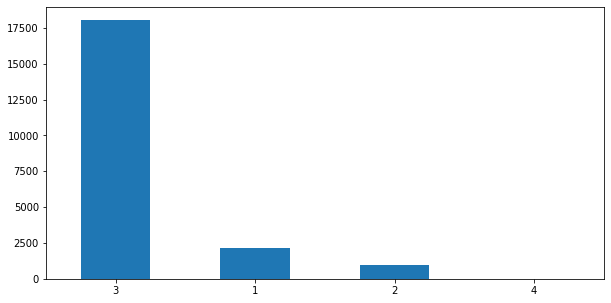

In [ ]:
# getting the most common Platform Type
plt.figure(figsize = (10, 5))
df['Platform Type'].value_counts().plot(kind = 'bar', rot = 0)
plt.show()

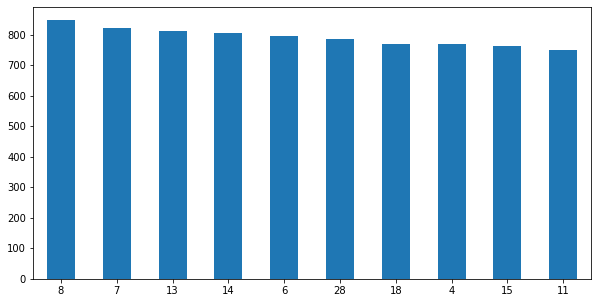

In [ ]:
# getting the top 10 most common Confirmation - Day of Month
plt.figure(figsize = (10, 5))
df['Confirmation - Day of Month'].value_counts()[:10].plot(kind = 'bar', rot = 0)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


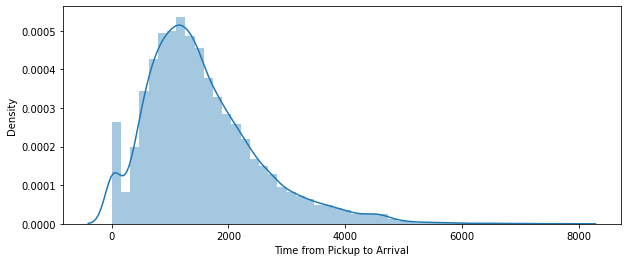

In [ ]:
# distribution of Time from Pickup to Arrival
plt.figure(figsize = (10,4))
sns.distplot(df['Time from Pickup to Arrival'])
plt.show()

## 3.3 Bivariate Analysis

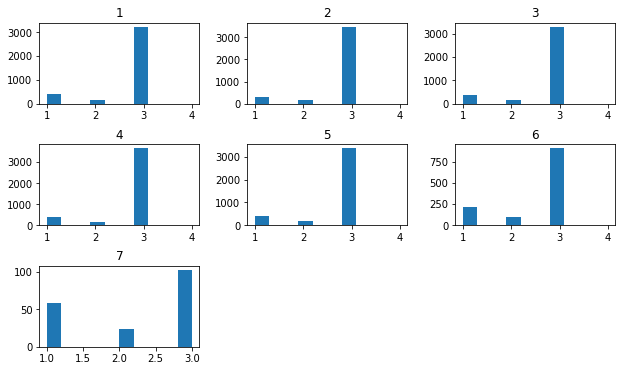

In [ ]:
# plot histogram of number of orders by month
df.hist('Platform Type', by = 'Confirmation - Weekday (Mo = 1)', rot = 0, figsize = (10, 6))
plt.show()

The third type of platform is the most common accross all days of the week.

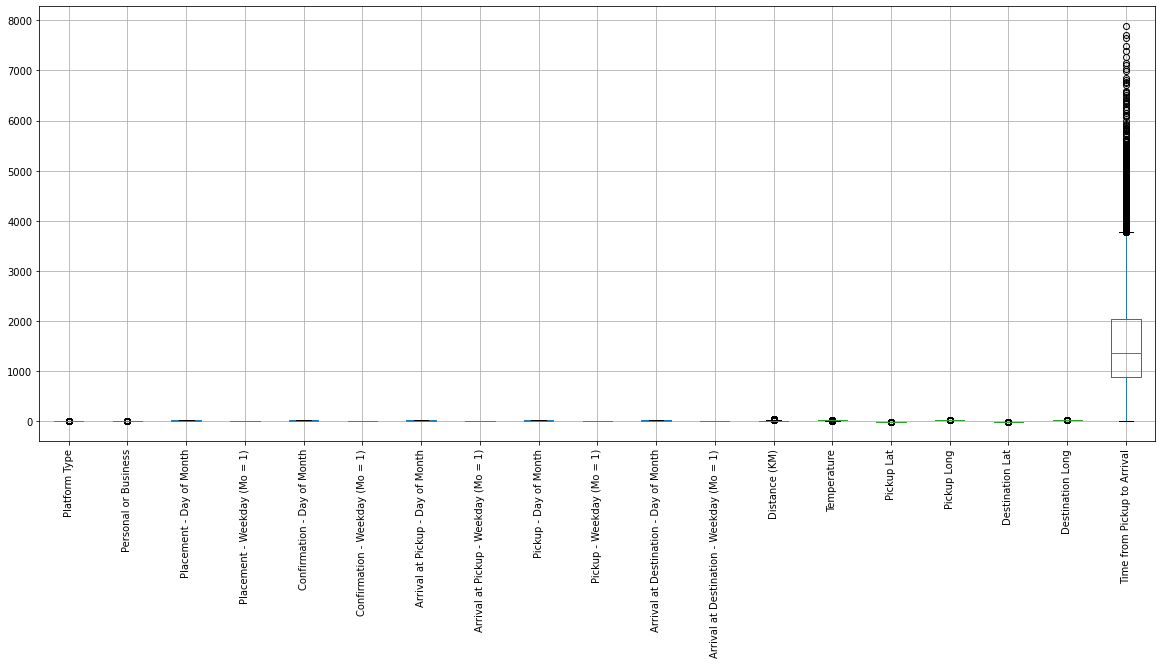

In [ ]:
# plot boxplot to visualize outliers
plt.figure(figsize = (20, 8))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

# <font color='#2F4F4F'>4. New Feature Creation</font>

In [22]:
# Compute Speed in Meters per second
df['Speed'] = (df['Distance (KM)']/df['Time from Pickup to Arrival'])*1000
df.sample(3)

,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,Speed
16144,3,1,4,1,4,1,4,1,4,1,4,1,3,21.900000,-1.258414,36.804800,-1.255189,36.782203,627,4.784689
18386,3,1,3,4,3,4,3,4,3,4,3,4,3,26.100000,-1.215601,36.891686,-1.228583,36.882647,659,4.552352
10474,3,1,26,5,26,5,26,5,26,5,26,5,9,23.258889,-1.261589,36.792873,-1.301446,36.766138,2566,3.507405


# <font color='#2F4F4F'>4. Data Modeling</font>

In [ ]:
df['Time from Pickup to Arrival'].describe()

count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Time from Pickup to Arrival, dtype: float64

## 4.1 Normal modeling

In [23]:
# # First we check for modeling without without standardisation

# split into features (X) and label (Y)
X = df.loc[: , df.columns != 'Time from Pickup to Arrival'].values
y = df.loc[: , 'Time from Pickup to Arrival'].values


In [24]:
# Import necessary models and metrics

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Split the data into test and train data and size of test data is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42) 

# initialize the model
rfr = RandomForestRegressor()

# fit the model
rfr.fit(X_train, y_train)

# make prediction
random_pred = rfr.predict(X_test)

# evaluating the RMSE and R2 scores
random_mse = mean_squared_error(y_test, random_pred)
random_rmse = random_mse**0.5
print("Random Forest MSE : ", random_mse)
print("Random Forest RMSE : ", random_rmse)





Random Forest MSE :  5992.07202518274
Random Forest RMSE :  77.40847515086924


## 4.2 Modeling with Standardization

In [25]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# fitting and transforming X_train while transforming X_test
X_train1 = X_scaler.fit_transform(X_train)
X_test1 = y_scaler.fit_transform(X_test)

# initialize the model
rfr2 = RandomForestRegressor()

# fit the model
rfr2.fit(X_train1, y_train)

# make prediction
random_pred2 = rfr2.predict(X_test1)

# evaluating the RMSE and R2 scores
random_mse2 = mean_squared_error(y_test, random_pred2)
random_rmse2 = random_mse2**0.5
print("Random Forest MSE : ", random_mse2)
print("Random Forest RMSE : ", random_rmse2)



Random Forest MSE :  44985.19728587598
Random Forest RMSE :  212.0971411544153


## 4.3 Modeling with Min Max Scaler

In [26]:
# Modeling with Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

# Performing normalisation 
norm = MinMaxScaler().fit(X_train) 
X_train3 = norm.transform(X_train) 
X_test3 = norm.transform(X_test)

# initialize the model
rfr3 = RandomForestRegressor()

# fit the model
rfr3.fit(X_train3, y_train)

# make prediction
random_pred3 = rfr3.predict(X_test3)

# evaluating the RMSE and R2 scores
random_mse3 = mean_squared_error(y_test, random_pred3)
random_rmse3 = random_mse2**0.5
print("Random Forest MSE : ", random_mse3)
print("Random Forest RMSE : ", random_rmse3)

Random Forest MSE :  6232.974554468286
Random Forest RMSE :  212.0971411544153


 Modelling without normalization or standardization gives us the best RMSE of 75 which is much lower than 10% of the mean time taken to make a delivery

## 4.4 Feature Selection

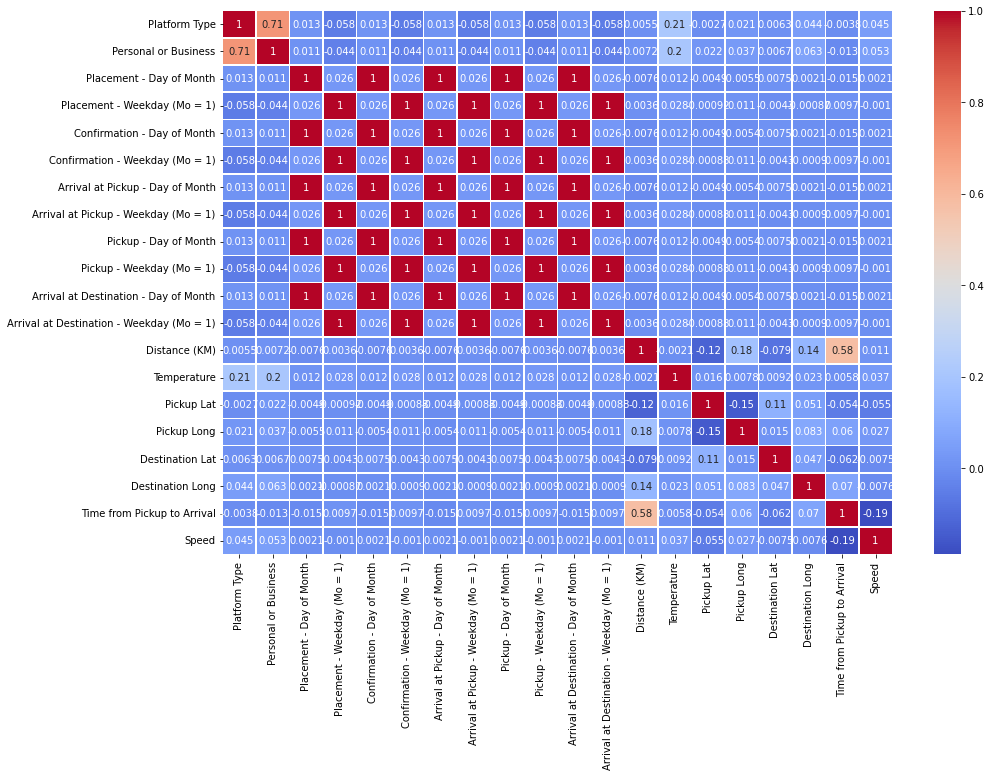

In [28]:
# compute correlation coefficients and plot the correlation matrix

df_corr = df.corr()
plt.figure(figsize=(15,10))

# We then plot our heatmap visualistion
# 
import seaborn as sns
sns.heatmap(df_corr, annot=True, linewidth=0.5, cmap='coolwarm');

We resolve to drop Speed, Destination Lat and Pickup Lat as these have the weakest correlation to time taken to make a delivery. We will also drop the columns that have perfect correlation with other columns.

## 4.5 Implementing feature selection based on correlation coefficient

In [29]:
df2 = df.drop(columns = ['Placement - Day of Month','Confirmation - Day of Month','Pickup - Day of Month','Arrival at Destination - Day of Month', 'Arrival at Pickup - Day of Month', 'Speed','Destination Lat','Pickup Lat'])
df2.dtypes

Platform Type                                  int64
Personal or Business                           int64
Placement - Weekday (Mo = 1)                   int64
Confirmation - Weekday (Mo = 1)                int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Pickup - Weekday (Mo = 1)                      int64
Arrival at Destination - Weekday (Mo = 1)      int64
Distance (KM)                                  int64
Temperature                                  float64
Pickup Long                                  float64
Destination Long                             float64
Time from Pickup to Arrival                    int64
dtype: object

In [30]:
df2.shape

(21201, 12)

In [33]:
# Modeling with the filtered columns
X1 = df2.loc[: , df2.columns != 'Time from Pickup to Arrival'].values
y1 = df2.loc[: , 'Time from Pickup to Arrival'].values

# Split the data into test and train data and size of test data is 20%
X_train4, X_test4, y_train4, y_test4 = train_test_split(X1, y1, test_size=.2, random_state = 42) 

# initialize the model
rfr5 = RandomForestRegressor()

# fit the model
rfr5.fit(X_train4, y_train4)

# make prediction
random_pred5 = rfr5.predict(X_test4)

# evaluating the RMSE and R2 scores
random_mse5 = mean_squared_error(y_test4, random_pred5)
random_rmse5 = random_mse5**0.5
print("Random Forest MSE : ", random_mse5)
print("Random Forest RMSE : ", random_rmse5)


Random Forest MSE :  680369.2575837651
Random Forest RMSE :  824.8449900337426


For now we will maintain the dataset with the initial columns since removal of some columns give a worse RMSE score of 824 compared with 75 seen initially

## 4.6 Wrapper Methods

In [35]:
# for from mlxtend.feature_selection import SequentialFeatureSelector to work, install the following packages
# importing six and sys
import six
import sys
sys.modules['sklearn.externals.six'] = six

# installing mlrose
!pip install mlrose
import mlrose

# importing joblib
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

rfr = RandomForestRegressor()

from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(rfr,
           k_features=4,
           forward=True,
           verbose=2,
           scoring='r2',
           cv=4)
 
# Perform step forward feature selection
feature_selector = feature_selector.fit(X_train, y_train) 



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   45.6s finished

[2021-12-30 09:50:41] Features: 1/4 -- score: 0.3444134453165658[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.0min finished

[2021-12-30 09:51:41] Features: 2/4 -- score: 0.9983997211154153[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:  2.6min finished

[2021-12-30 09:54:16] Features: 3/4 -- score: 0.9983558850706147[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [36]:
# Which are the selected features?
# The columns at these indexes are those which were selected
# ---
#
feat_cols = list(feature_selector.k_feature_idx_)
print(feat_cols)

[0, 1, 12, 18]


In [43]:
# we implement using the selected features
# Without step forward feature selection (sffs)
rfr6 = RandomForestRegressor()
rfr6.fit(X_train, y_train)

# With step forward feature selection
rfr7 = RandomForestRegressor()
rfr7.fit(X_train[:, feat_cols], y_train)

# Making Predictions and determining the accuracies
y_test_pred = rfr6.predict(X_test)
print('random forest RMSE Without sffs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

y_test_pred2 = rfr7.predict(X_test[:, feat_cols])
print('random forest RMSE with sffs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2)))

random forest RMSE Without sffs: 79.77063176179873
random forest RMSE with sffs: 68.19207943773904


Step forward gives us a better RMSE score of 68 compared with 79 which does not implement step forward.

## 4.7 Implementing PCA

In [45]:
# Implementing PCA
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42) 

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

rfr8 = RandomForestRegressor()
rfr8.fit(X_train, y_train)

# make prediction
random_pred8 = rfr8.predict(X_test)

# evaluating the RMSE and R2 scores
random_mse8 = mean_squared_error(y_test, random_pred8)
random_rmse8 = random_mse8**0.5
print("Random Forest MSE : ", random_mse8)
print("Random Forest RMSE : ", random_rmse8)



Random Forest MSE :  7257.750830888943
Random Forest RMSE :  85.192434117643


PCA gives us a much higher RMSE compares to step forward wrapper method

## 4.8 Implementing LDA

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 42) 

lda = LinearDiscriminantAnalysis()

lda.fit_transform(X, y)

rfr9 = RandomForestRegressor()
rfr9.fit(X_train, y_train)

# make prediction
random_pred9 = rfr9.predict(X_test)

# evaluating the RMSE and R2 scores
random_mse9 = mean_squared_error(y_test, random_pred9)
random_rmse9 = random_mse9**0.5
print("Random Forest MSE : ", random_mse9)
print("Random Forest RMSE : ", random_rmse9)


Random Forest MSE :  5976.888464348032
Random Forest RMSE :  77.31033866403659


LDA gives us a lower RMSE compared to PCA.

# <font color='#2F4F4F'>5. Summary of Findings</font>

Summarize your findings.

we adopted the random forest regressor model with step forward wrapper which gave us the lowest RMSE score. This was done by including all the columns that remaind after the cleanup and feature creation exercise.

# <font color='#2F4F4F'>6. Recommendations</font>

Its been decided that we implement Step Forward wrapper method which gave us the lowest RMSE thus will enable us to accuratey predict the time taken to deliver a package

# <font color='#2F4F4F'>7. Challenging your Solution</font>

### a) Did we have the right question?
Yes we did


### b) Did we have the right data?
Yes though we will need more data for further testing and also attempt step backwark wrapper method

### c) What can be done to improve the solution?

Hyperparameter tuning
Feature engineering
Add more data to train the model better.
